In [1]:
from kmeans_clustering import *
from elbow_method import *
from image_compression import *

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Vanilla K-means versus K-means++ 

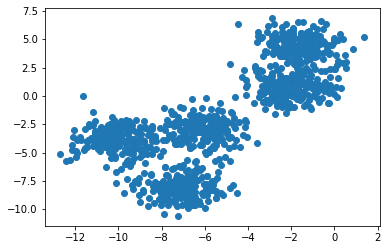

In [10]:
# Generate and plot random data points
data, _ = generate_random_numbers(num_count=1000, num_cluster=5, seed=1)
plt.scatter(data[:, 0], data[:, 1])
plt.show()

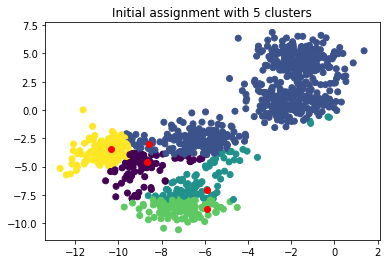

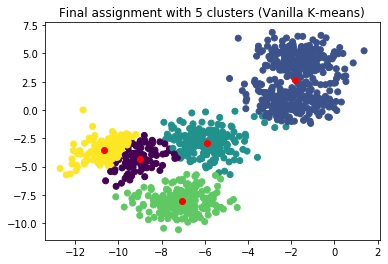

In [18]:
# Vanilla k-means
cost_history = run_k_mean(data, num_cluster=5)
min_cost = cost_history[len(cost_history) - 1]

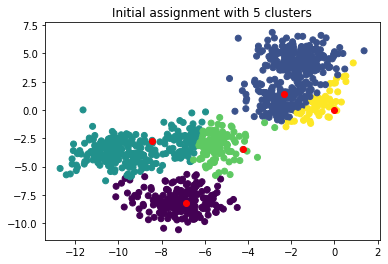

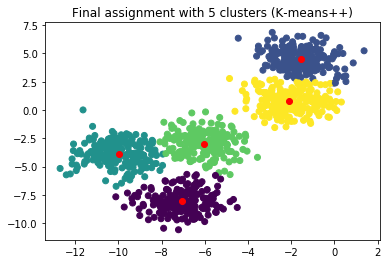

In [13]:
# K-means++
cost_history_pp = run_k_mean(data, num_cluster=5, kmpp=True)
min_cost_pp = cost_history_pp[len(cost_history_pp) - 1]

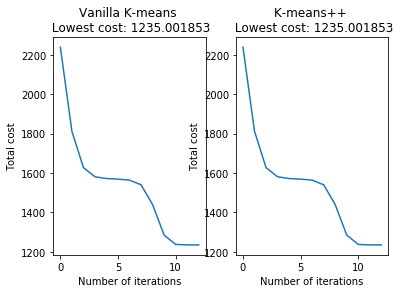

In [5]:
# Plot cost history of two algorithms
fig, ax = plt.subplots(1, 2)
ax[0].plot(cost_history)
ax[0].set_title("Vanilla K-means \n Lowest cost: %f" % min_cost)
ax[0].set_xlabel("Number of iterations")
ax[0].set_ylabel("Total cost")
ax[1].plot(cost_history)
ax[1].set_title("K-means++ \n Lowest cost: %f" % min_cost_pp)
ax[1].set_xlabel("Number of iterations")
ax[1].set_ylabel("Total cost")
plt.show()

In the example, vanilla obtains a worse assignment with higher cost because of its poor centroid initialization. However, it can still achieve the optimal assignment in other runs.

# Elbow method
In this example, I'll use scikit-learn's implementation of K-means. 


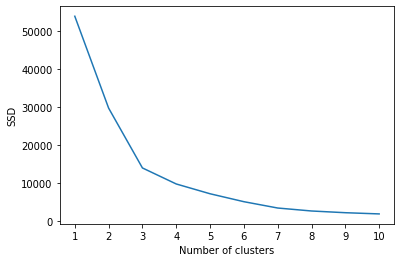

In [6]:
ls = range(1, 11)
data, _ = generate_random_numbers(num_cluster=10)

ssd = elbow_method(data, ls)
plt.plot(ls, ssd)
plt.xticks(np.arange(1, 11, 1.0))
plt.xlabel("Number of clusters")
plt.ylabel("SSD")
plt.show()

From the graph above, the appropriate number of clusters for this data set is 3, which lies at the elbow of the curve.


# Image compression
Image compression and decompression is another popular application of K-means clustering. In this example, we experiment with different numbers of clusters, or numbers of colors in the output images. 

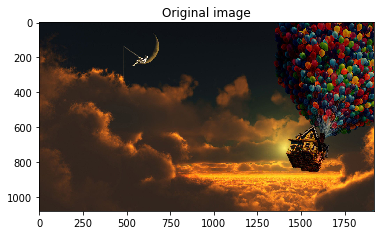

In [7]:
im = np.array(Image.open('house.jpg'))
plt.imshow(im)
plt.title('Original image')
plt.show()

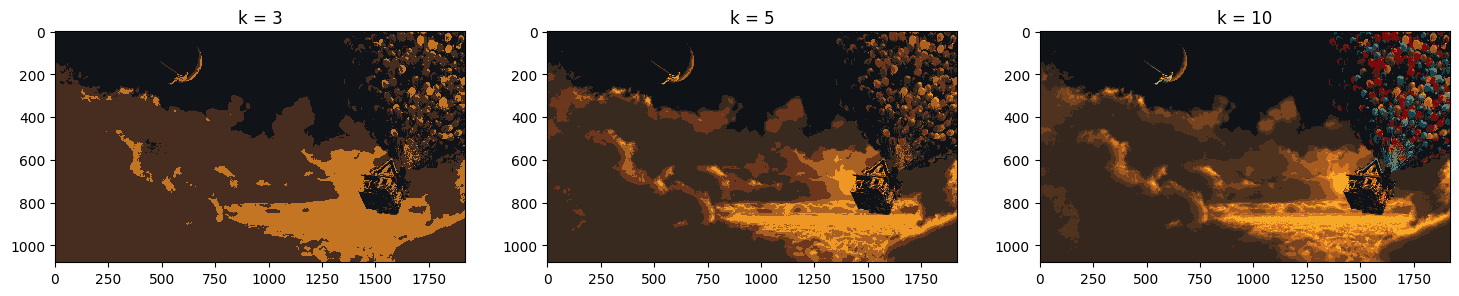

In [8]:
k_ls = [3, 5, 10]
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(18, 16), dpi=100)
for i in range(len(k_ls)):
    out = compress_image(im, k_ls[i])
    ax = axs[i]
    ax.imshow(out)
    ax.set_title('k = %d' % k_ls[i])
plt.show()